# Application Results

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Set path:

In [132]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Application/'

Set dataset:

In [39]:
data_names = ['voltage_2022-09-18','voltage_2022-10-01','voltage_2022-10-08','voltage_2023-01-08']

Set metric:

In [21]:
metric = 0 # RMSE: 0, MAE: 1, MAPE: 2, R^2: 3

## Best Performance

In [63]:
ind = ['EQUAL', 'EXP', 'RAY', 'BAR', 'PAR', 'TUK']
col1 = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
col2 = ['RNN','LSTM','GRU']
columns = pd.MultiIndex.from_tuples(list(itertools.product(col1, col2)))
df_best = pd.DataFrame(columns = columns, index = ind)
df_best.index.names = ['Weights']
df_best = df_best.T

In [64]:
df_best

Weights         EQUAL  EXP  RAY  BAR  PAR  TUK
18/09/2022 RNN    NaN  NaN  NaN  NaN  NaN  NaN
           LSTM   NaN  NaN  NaN  NaN  NaN  NaN
           GRU    NaN  NaN  NaN  NaN  NaN  NaN
01/10/2022 RNN    NaN  NaN  NaN  NaN  NaN  NaN
           LSTM   NaN  NaN  NaN  NaN  NaN  NaN
           GRU    NaN  NaN  NaN  NaN  NaN  NaN
08/10/2022 RNN    NaN  NaN  NaN  NaN  NaN  NaN
           LSTM   NaN  NaN  NaN  NaN  NaN  NaN
           GRU    NaN  NaN  NaN  NaN  NaN  NaN
08/01/2023 RNN    NaN  NaN  NaN  NaN  NaN  NaN
           LSTM   NaN  NaN  NaN  NaN  NaN  NaN
           GRU    NaN  NaN  NaN  NaN  NaN  NaN

In [65]:
# dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
#str_model = ['RNN', 'LSTM', 'GRU']
#weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
dates = ['18/09/2022']
str_model = ['RNN']
weight_type = ['exponential']
for k in range(len(dates)):
    for i in range(len(str_model)):
        for j in range(len(weight_type)+1):
            if j==0:
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_results.npz') as data:
                    df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric],4)
            else:
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_'+weight_type[j-1]+'_results.npz') as data:
                    df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric],4)

In [66]:
df_best

Weights           EQUAL     EXP  RAY  BAR  PAR  TUK
18/09/2022 RNN   0.1763  0.1725  NaN  NaN  NaN  NaN
           LSTM     NaN     NaN  NaN  NaN  NaN  NaN
           GRU      NaN     NaN  NaN  NaN  NaN  NaN
01/10/2022 RNN      NaN     NaN  NaN  NaN  NaN  NaN
           LSTM     NaN     NaN  NaN  NaN  NaN  NaN
           GRU      NaN     NaN  NaN  NaN  NaN  NaN
08/10/2022 RNN      NaN     NaN  NaN  NaN  NaN  NaN
           LSTM     NaN     NaN  NaN  NaN  NaN  NaN
           GRU      NaN     NaN  NaN  NaN  NaN  NaN
08/01/2023 RNN      NaN     NaN  NaN  NaN  NaN  NaN
           LSTM     NaN     NaN  NaN  NaN  NaN  NaN
           GRU      NaN     NaN  NaN  NaN  NaN  NaN

In [67]:
print(df_best.to_latex(escape=False))

\begin{tabular}{llllllll}
\toprule
           & Weights &   EQUAL &     EXP &  RAY &  BAR &  PAR &  TUK \\
\midrule
18/09/2022 & RNN &  0.1763 &  0.1725 &  NaN &  NaN &  NaN &  NaN \\
           & LSTM &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & GRU &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
01/10/2022 & RNN &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & LSTM &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & GRU &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
08/10/2022 & RNN &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & LSTM &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & GRU &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
08/01/2023 & RNN &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & LSTM &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
           & GRU &     NaN &     NaN &  NaN &  NaN &  NaN &  NaN \\
\bottomrule
\end{tabular}



## Overall Performance

In [128]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Select model:

In [68]:
str_model = 'RNN'

In [72]:
# dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
#str_model = ['RNN', 'LSTM', 'GRU']
#weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
dates = ['18/09/2022','01/10/2022']
weight_type = ['exponential']

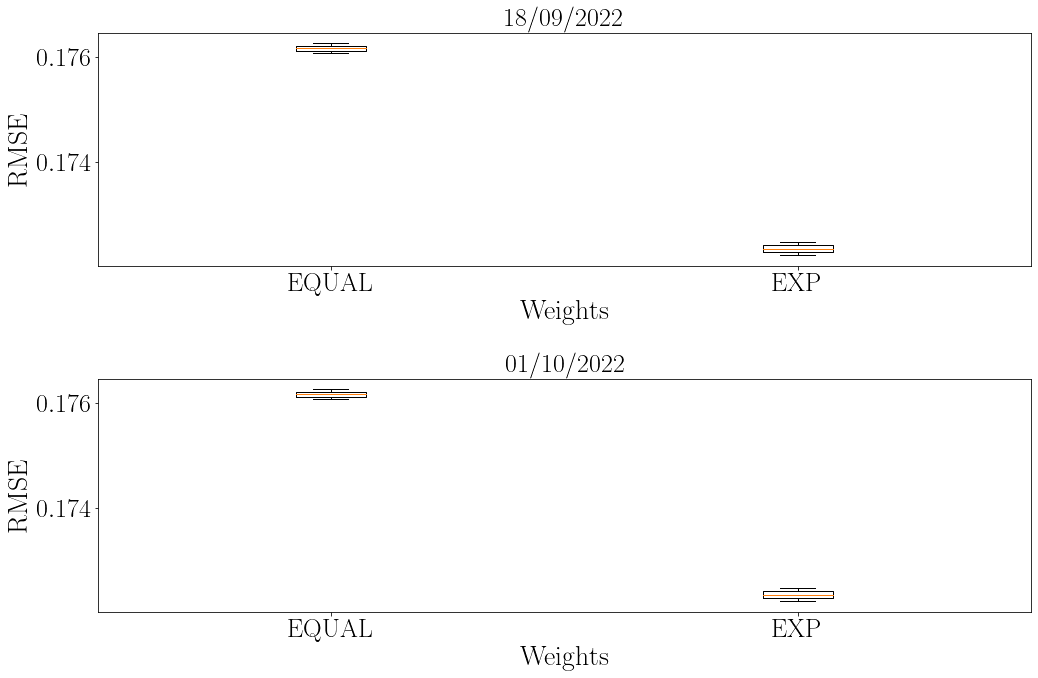

In [133]:
fig, axs = plt.subplots(len(dates),1, figsize=(15, 10))
for i in range(len(dates)):
    df_data = pd.DataFrame()
    for j in range(len(weight_type)+1):
        if j==0:
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        else:    
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_'+weight_type[j-1]+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
    axs[i].boxplot(df_data)
    axs[i].set_title(dates[i])
    axs[i].set_xlabel('Weights')
    axs[i].set_ylabel('RMSE')
    axs[i].set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])

fig.tight_layout()
plt.savefig(path+'Figures/'+'overallperf_voltage.pdf', bbox_inches='tight')
plt.show()